In [1]:
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
def load_embedding_dict(path_to_glove_file):
  embedding_dict = {}
  with open(path_to_glove_file, 'r') as f:
    for line in f:
      val = line.split()
      word = val[0]
      vector = np.asarray(val[1:], "float32")
      embedding_dict[word] = vector
  return embedding_dict

def weighted_vector(input, path):
  embedding_dict = load_embedding_dict(path)
  return sum(embedding_dict[w]* prob for w,prob in input)



In [3]:
embedding_dict = load_embedding_dict('glove.6B.300d.txt')

In [4]:
def weighted_vector(input, embedding_dict):
  return sum(embedding_dict[w]* prob for w,prob in input if w in embedding_dict)/sum( prob for w,prob in input if w in embedding_dict)

In [5]:
NUM_TOPICS = 20
NUM_WORDS = 10
import pickle
with open('topics_dic_'+str(NUM_TOPICS)+'_'+str(NUM_WORDS)+'.pkl','rb') as f:
    Input = pickle.load(f)

In [6]:
Input[1437]

[(0,
  [('actually', 0.03669041),
   ('leaky', 0.036554243),
   ('perception', 0.036554243),
   ('first', 0.024675718),
   ('numerical', 0.024675712),
   ('principle', 0.024675712),
   ('really', 0.024675703),
   ('pound', 0.024675697),
   ('psychological', 0.012650636),
   ('versus', 0.012638651)]),
 (1,
  [('study', 0.032240335),
   ('economics', 0.0295085),
   ('shock', 0.021732261),
   ('electric', 0.021732261),
   ('merely', 0.021732254),
   ('would', 0.021732248),
   ('people', 0.011150664),
   ('random', 0.011131015),
   ('nuzzle', 0.011131015),
   ('stops', 0.011131015)]),
 (2,
  [('economics', 0.028892929),
   ('try', 0.027604291),
   ('duration', 0.027579254),
   ('think', 0.0145815015),
   ('happiness', 0.014138662),
   ('silently', 0.014138662),
   ('life', 0.01413866),
   ('neoclassical', 0.01413866),
   ('engineering', 0.01413866),
   ('circumstances', 0.01413866)]),
 (3,
  [('something', 0.090621814),
   ('thing', 0.037911057),
   ('german', 0.03780935),
   ('actually', 

In [7]:
res1 = {}
for idx in Input.keys():
    cur_input = Input[idx]
    cur_matrix = np.zeros((NUM_TOPICS,300))
    for x,y in cur_input:
        temp = weighted_vector(y, embedding_dict)
        cur_matrix[x,:] = temp/np.linalg.norm(temp)
    res1[idx] = cur_matrix

In [8]:
res1[1437]

array([[-0.03191324,  0.05020998, -0.03023681, ..., -0.02229455,
        -0.00558806,  0.03425717],
       [ 0.01086353,  0.04358998, -0.00534921, ...,  0.0093588 ,
         0.00811232,  0.06742989],
       [ 0.00012421,  0.02205048, -0.03955001, ...,  0.04210504,
        -0.01258243,  0.07677636],
       ...,
       [ 0.0349372 , -0.00797423,  0.03037454, ..., -0.03209136,
         0.00668105, -0.01991871],
       [ 0.00889267,  0.0370742 , -0.03071335, ...,  0.02926503,
        -0.01133661, -0.01252243],
       [-0.01317377,  0.0171669 , -0.05224964, ...,  0.01392753,
         0.01700716,  0.04778004]])

In [9]:
A=res1[1810]
B = np.dot(A,A.T)
print(np.prod(sorted(np.linalg.eigvals(B))[-5:]))
#print(B)

2.8158312243310757


In [10]:
def create_div(res,k):
    div_dic = {}
    for key in res.keys():
        B = np.dot(res[key],res[key].T)
        x = (np.prod(sorted(np.linalg.eigvals(B))[-k:])).real
        #print(x,k)
        div_dic[key] = x
    return div_dic
topics_to_keep =5
div_dic = create_div(res1,topics_to_keep)
pickle.dump(div_dic,open('div_dic.pkl','wb'))

In [11]:
div_ar = list(div_dic.values())

(array([  8.,   0.,  10.,  28.,  74., 113., 121., 140., 180., 179., 189.,
        151., 127., 106., 101., 118.,  84.,  88.,  57.,  53.,  72.,  45.,
         34.,  45.,  43.,  39.,  34.,  19.,  22.,  17.,  16.,  15.,  16.,
         14.,  13.,   9.,  11.,   7.,   5.,  10.,  12.,   4.,   3.,   5.,
          2.,   4.,   2.,   3.,   2.,   5.,   2.,   3.,   3.,   2.,   2.,
          1.,   0.,   2.,   0.,   2.,   1.,   0.,   0.,   1.,   0.,   2.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.65858233e-313, 3.76264019e-001, 7.52528039e-001, 1.12879206e+000,
        1.50505608e+000, 1.88132010e+000, 2.25758412e+000, 2.63384814e+000,
        3.01011216e+000, 3.38637618e+000, 3.76264019e+000, 4.13890421e+000,
        4.51516823e+000, 4.89143225e+000, 5.26769627e+000, 5.64396029e+000,
        6.0202

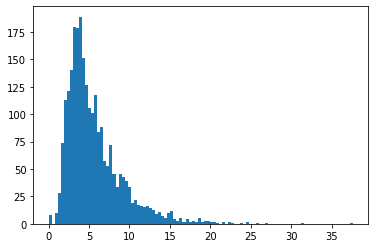

In [12]:
#print(div_ar)
plt.hist(div_ar,bins=100)

In [13]:
with open('../Data/all_features.pkl','rb') as f:
    all_df = pickle.load(f)

In [14]:
rating_names = ['beautiful', 'confusing', 'courageous', 'fascinating', 'funny', 'informative', 'ingenious', 'inspiring', 'jaw-dropping', 'longwinded', 'obnoxious', 'ok', 'persuasive', 'unconvincing']
pos_ratings_1 = ['beautiful', 'courageous', 'fascinating', 'funny']
pos_ratings_2 = ['informative', 'ingenious', 'inspiring', 'jaw-dropping']
neg_ratings = ['confusing', 'longwinded', 'obnoxious', 'ok', 'persuasive', 'unconvincing']


male_rat_dic = {}
for rat in rating_names:
    male_rat_dic[rat] = []

other_rat_dic = {}
for rat in rating_names:
    other_rat_dic[rat] = []

all_rat_dic = {}
for rat in rating_names:
    all_rat_dic[rat] = []
    
male_diversity_ar = [] 
other_diversity_ar = []
all_diversity_ar = []
for i in range(all_df.shape[0]):
    doc_id = all_df['Video_ID'][i]
    divval = div_dic[doc_id]
    
    if int(all_df['Male'][i]) == 1:
        male_diversity_ar.append(divval)
        for rat in rating_names:  
            rating = float(all_df[rat][i])/float(all_df['total_count'][i])
            male_rat_dic[rat].append(rating)
    else:
        other_diversity_ar.append(divval)
        for rat in rating_names:  
            rating = float(all_df[rat][i])/float(all_df['total_count'][i])
            other_rat_dic[rat].append(rating)
            
    all_diversity_ar.append(divval)       
    for rat in rating_names: 
        rating = float(all_df[rat][i])/float(all_df['total_count'][i])
        all_rat_dic[rat].append(rating)
      

In [15]:
for rat in rating_names:
    plt.plot(all_diversity_ar,all_rat_dic[rat],'.',label=rat)
    #plt.plot(male_diversity_ar,male_rat_dic[rat],'.',label='male')
    #plt.plot(other_diversity_ar,other_rat_dic[rat],'.',label='other')
    plt.legend()
    plt.tight_layout()
plt.savefig('All_scatter.pdf')
plt.close()

In [16]:
for rat in rating_names:
    #plt.plot(all_diversity_ar,all_rat_dic[rat],'.',label='all')
    corr_male = str(np.corrcoef(male_diversity_ar,male_rat_dic[rat])[0][1])
    corr_other = str(np.corrcoef(other_diversity_ar,other_rat_dic[rat])[0][1])
    plt.plot(male_diversity_ar,male_rat_dic[rat],'.',label='male'+corr_male)
    plt.plot(other_diversity_ar,other_rat_dic[rat],'.',label='other'+corr_other)
    plt.legend()
    plt.tight_layout()
    plt.savefig(rat+'.pdf')
    plt.close()

In [90]:
def remove_ol_and_do_binning(dl,rc,num_bin,sigma):
    
    #creating zipped list and removing outlier
    rat_cur = sorted(list(zip(dl,rc)))#[lower_limit:upper_limit]
    z = np.abs(stats.zscore(rat_cur))
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
   
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    #print(div_ar)
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates, std_divs, std_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar], [divs.std() for divs in new_div_ar], [rates.std() for rates in new_rating_ar]
    return np.array(mean_divs), np.array(mean_rates), np.array(std_divs), np.array(std_rates)

In [33]:
def pol(coeff,x):
    ans = 0
    n= len(coeff)-1
    for i,c in enumerate(coeff):
        ans = ans + c* x**(n-i)
    return ans

def polyfit(mean_divs,mean_rates,deg):
    coeffs = np.polyfit(mean_divs, mean_rates, deg)
    predicted = [pol(coeffs,x) for x in mean_divs]
    return predicted

In [18]:
num_bin,sigma = 7, 3
for rat in rating_names:
    all_mean_divs, all_mean_rates = remove_ol_and_do_binning(all_diversity_ar,all_rat_dic[rat],num_bin,sigma)
    male_mean_divs, male_mean_rates = remove_ol_and_do_binning(male_diversity_ar,male_rat_dic[rat],num_bin,sigma)
    other_mean_divs, other_mean_rates = remove_ol_and_do_binning(other_diversity_ar,other_rat_dic[rat],num_bin,sigma)
    
    
#     plt.plot(all_mean_divs,all_mean_rates,'-*',label='all')
    plt.plot(male_mean_divs,male_mean_rates,'-.',label='male')
    plt.plot(other_mean_divs,other_mean_rates,'-^',label='other')
    plt.legend()
    plt.tight_layout()
    plt.savefig(rat+'.pdf')
    plt.close()

In [19]:
num_bin,sigma = 7, 3
for rat in rating_names:
    all_mean_divs, all_mean_rates = remove_ol_and_do_binning(all_diversity_ar,all_rat_dic[rat],num_bin,sigma)
    male_mean_divs, male_mean_rates = remove_ol_and_do_binning(male_diversity_ar,male_rat_dic[rat],num_bin,sigma)
    other_mean_divs, other_mean_rates = remove_ol_and_do_binning(other_diversity_ar,other_rat_dic[rat],num_bin,sigma)
    
    
    plt.plot(all_mean_divs,all_mean_rates,'-*',label=rat)
#     plt.plot(male_mean_divs,male_mean_rates,'-.',label='male')
#     plt.plot(other_mean_divs,other_mean_rates,'-^',label='other')
    plt.legend()
    plt.tight_layout()
plt.savefig('All.pdf')
plt.close()

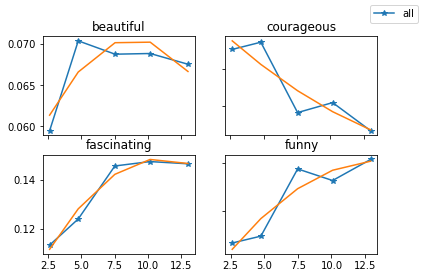

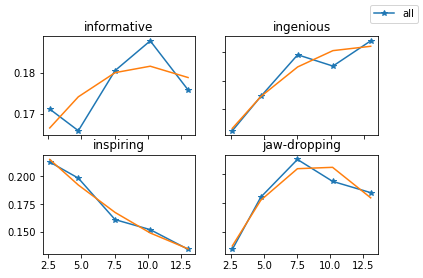

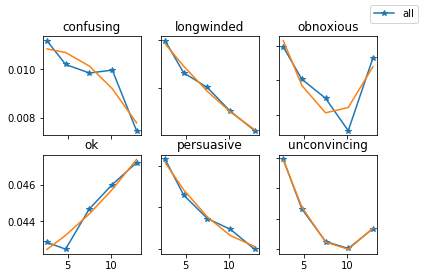

In [81]:
num_bin,sigma = 6, 3
deg = 2
fig_pos1, axs_pos1 = plt.subplots(2, 2)
fig_pos2, axs_pos2 = plt.subplots(2, 2)
fig_neg, axs_neg = plt.subplots(2, 3)
pos1_ind,pos2_ind,neg_ind = 0,0,0
for rat_ind,rat in enumerate(rating_names):
    #print(rat_ind)
    all_mean_divs, all_mean_rates = remove_ol_and_do_binning(all_diversity_ar,all_rat_dic[rat],num_bin,sigma)
    male_mean_divs, male_mean_rates = remove_ol_and_do_binning(male_diversity_ar,male_rat_dic[rat],num_bin,sigma)
    other_mean_divs, other_mean_rates = remove_ol_and_do_binning(other_diversity_ar,other_rat_dic[rat],num_bin,sigma)
    
    if rat in pos_ratings_1:
        ax = axs_pos1[int(pos1_ind/2)][int(pos1_ind%2)] 
        if pos1_ind == 0:
            label_all, label_male, label_other = 'all', 'male', 'other'
        else:
            label_all, label_male, label_other = None, None, None
            
        ax.plot(all_mean_divs,all_mean_rates,'-*',label=label_all)
        ax.plot(all_mean_divs,polyfit(all_mean_divs,all_mean_rates,deg) )
        #ax.plot(male_mean_divs,male_mean_rates,'-.',label=label_male)
        #ax.plot(other_mean_divs,other_mean_rates,'-^',label=label_other)
        ax.set_title(rat)
        pos1_ind = pos1_ind+1
        
    elif rat in pos_ratings_2:
        ax = axs_pos2[int(pos2_ind/2)][int(pos2_ind%2)] 
        if pos2_ind == 0:
            label_all, label_male, label_other = 'all', 'male', 'other'
        else:
            label_all, label_male, label_other = None, None, None
            
        ax.plot(all_mean_divs,all_mean_rates,'-*',label=label_all)
        ax.plot(all_mean_divs,polyfit(all_mean_divs,all_mean_rates,deg) )
        #ax.plot(male_mean_divs,male_mean_rates,'-.',label=label_male)
        #ax.plot(other_mean_divs,other_mean_rates,'-^',label=label_other)
        ax.set_title(rat)
        pos2_ind = pos2_ind+1
        
    else:
        ax = axs_neg[int(neg_ind/3)][int(neg_ind%3)] 
        if neg_ind == 0:
            label_all, label_male, label_other = 'all', 'male', 'other'
        else:
            label_all, label_male, label_other = None, None, None
            
        ax.plot(all_mean_divs,all_mean_rates,'-*',label=label_all)
        ax.plot(all_mean_divs,polyfit(all_mean_divs,all_mean_rates,deg) )
        #ax.plot(male_mean_divs,male_mean_rates,'-.',label=label_male)
        #ax.plot(other_mean_divs,other_mean_rates,'-^',label=label_other)
        ax.set_title(rat)
        neg_ind = neg_ind+1
fig_pos1.legend()  
fig_pos2.legend()
fig_neg.legend()  
for ax in axs_pos1.flat:
    ax.label_outer()    
for ax in axs_pos2.flat:
    ax.label_outer() 
for ax in axs_neg.flat:
    ax.label_outer() 
fig_pos1.savefig('Positive1.pdf')
fig_pos2.savefig('Positive2.pdf')
fig_neg.savefig('Negative.pdf')
#plt.close()

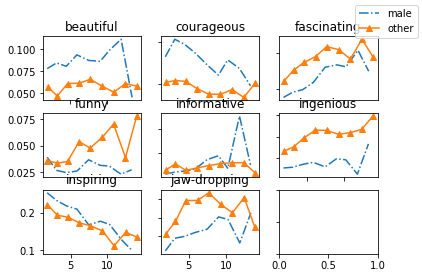

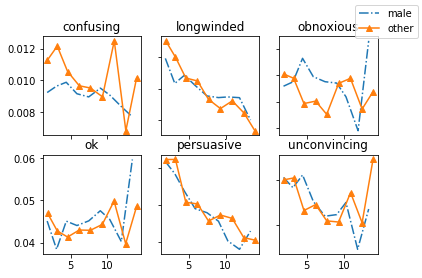

In [24]:
num_bin,sigma = 10, 3
fig_pos, axs_pos = plt.subplots(3, 3)
fig_neg, axs_neg = plt.subplots(2, 3)
pos_ind,neg_ind = 0,0
for rat_ind,rat in enumerate(rating_names):
    #print(rat_ind)
    all_mean_divs, all_mean_rates = remove_ol_and_do_binning(all_diversity_ar,all_rat_dic[rat],num_bin,sigma)
    male_mean_divs, male_mean_rates = remove_ol_and_do_binning(male_diversity_ar,male_rat_dic[rat],num_bin,sigma)
    other_mean_divs, other_mean_rates = remove_ol_and_do_binning(other_diversity_ar,other_rat_dic[rat],num_bin,sigma)
    
    if rat in pos_ratings_1 or rat in pos_ratings_2:
        ax = axs_pos[int(pos_ind/3)][int(pos_ind%3)] 
        if pos_ind == 0:
            label_all, label_male, label_other = 'all', 'male', 'other'
        else:
            label_all, label_male, label_other = None, None, None
            
#         ax.plot(all_mean_divs,all_mean_rates,'-*',label=label_all)
        ax.plot(male_mean_divs,male_mean_rates,'-.',label=label_male)
        ax.plot(other_mean_divs,other_mean_rates,'-^',label=label_other)
        ax.set_title(rat)
        pos_ind = pos_ind+1
        
        
    else:
        ax = axs_neg[int(neg_ind/3)][int(neg_ind%3)] 
        if neg_ind == 0:
            label_all, label_male, label_other = 'all', 'male', 'other'
        else:
            label_all, label_male, label_other = None, None, None
            
#         ax.plot(all_mean_divs,all_mean_rates,'-*',label=label_all)
        ax.plot(male_mean_divs,male_mean_rates,'-.',label=label_male)
        ax.plot(other_mean_divs,other_mean_rates,'-^',label=label_other)
        ax.set_title(rat)
        neg_ind = neg_ind+1
fig_pos.legend()  
fig_neg.legend()  
for ax in axs_pos.flat:
    ax.label_outer()    
for ax in axs_neg.flat:
    ax.label_outer() 
fig_pos.savefig('Positive.pdf')
fig_neg.savefig('Negative.pdf')

In [88]:
def plot_curve_and_fit_all(rat_name,num_bin,sigma,deg):
    
    all_mean_divs, all_mean_rates = remove_ol_and_do_binning(all_diversity_ar,all_rat_dic[rat_name],num_bin,sigma)
    plt.plot(all_mean_divs, all_mean_rates,'-.',label='True')
    plt.plot(all_mean_divs,polyfit(all_mean_divs,all_mean_rates,deg),'-^',label='fitted')
    plt.legend()
    plt.savefig('Plots/'+rat_name+'_fitted.pdf')
    plt.close()
sigma, deg = 3, 2    
rating_bin_pair = [('beautiful',7), ('confusing',8), ('courageous',7), ('fascinating',7), ('funny',7), ('informative',7), ('ingenious',6), ('inspiring',8), ('jaw-dropping',6), ('longwinded',7), ('obnoxious',8), ('ok',7), ('persuasive',7), ('unconvincing',6)]
for rat_name,num_bin in rating_bin_pair:
    plot_curve_and_fit_all(rat_name,num_bin,sigma,deg)
    

ValueError: too many values to unpack (expected 2)

In [102]:
def plot_curve_and_fit_all_errorband(rat_name,num_bin,sigma,deg,epsilon):
    
    all_mean_divs, all_mean_rates, all_std_divs, all_std_rates = remove_ol_and_do_binning(all_diversity_ar,all_rat_dic[rat_name],num_bin,sigma)
    plt.plot(all_mean_divs, all_mean_rates,'-.',label='Mean')
    error = epsilon*all_std_rates
    plt.fill_between(all_mean_divs, all_mean_rates-error,all_mean_rates+error,facecolor='#FF9848')
    #plt.plot(all_mean_divs,polyfit(all_mean_divs,all_mean_rates,deg),'-^',label='fitted')
    plt.xlabel('Variation Metric')
    plt.ylabel('Rating')
    plt.title(rat_name)
    plt.legend()
    plt.savefig('Plots/'+rat_name+'_errorband.pdf')
    plt.close()
sigma, deg, epsilon = 3, 2, 0.03    
rating_bin_pair = [('beautiful',7), ('confusing',8), ('courageous',7), ('fascinating',7), ('funny',7), ('informative',7), ('ingenious',6), ('inspiring',8), ('jaw-dropping',6), ('longwinded',7), ('obnoxious',8), ('ok',7), ('persuasive',7), ('unconvincing',6)]
for rat_name,num_bin in rating_bin_pair:
    plot_curve_and_fit_all_errorband(rat_name,num_bin,sigma,deg,epsilon)

In [103]:
for k in res1:
    A = res1[k]
    B = np.dot()

dict_keys([1437, 2880, 2658, 1351, 49, 1345, 809, 2894, 1423, 2102, 61, 821, 2664, 2670, 75, 1379, 835, 2116, 606, 2843, 2857, 174, 148, 1153, 1621, 2328, 1147, 2466, 1609, 2300, 2314, 2472, 2499, 1190, 404, 362, 410, 1184, 1812, 1806, 2248, 1999, 1741, 1755, 1033, 2512, 2274, 2260, 1769, 570, 1782, 216, 202, 1796, 1966, 1972, 558, 1231, 2738, 1557, 2076, 955, 1219, 2704, 941, 799, 2062, 2089, 1580, 772, 766, 1594, 996, 983, 997, 767, 1595, 1581, 2088, 773, 940, 2705, 2063, 2077, 2711, 1218, 954, 1230, 1556, 1542, 1224, 968, 1973, 1797, 203, 565, 571, 217, 1783, 1768, 2261, 2507, 2513, 2275, 1754, 1032, 1998, 2249, 1807, 439, 1813, 377, 1185, 411, 405, 1191, 2498, 363, 388, 2315, 2473, 2467, 2301, 1608, 2329, 1620, 1146, 1152, 1634, 149, 613, 2856, 175, 161, 2842, 607, 1378, 74, 2671, 2117, 2103, 2665, 820, 60, 2895, 1344, 48, 1422, 1436, 1350, 2659, 2881, 2129, 1420, 1346, 2883, 1352, 1434, 188, 2115, 2673, 76, 836, 62, 2667, 2101, 177, 2854, 89, 605, 1391, 2698, 2840, 163, 639, 1144,